<a href="https://colab.research.google.com/github/kalyan8324/kaggile/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [23]:
file_path = '/kaggle/input/house-price-prediction-simplified-for-regression/Real_Estate.csv'
df = pd.read_csv(file_path)
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


**linear regression**

In [24]:
#  splitting y:dependent varibles and x:independent varibles or feature and tergat varibles
x = df.drop(["Transaction date","House price of unit area"],axis='columns')
y = df["House price of unit area"]
# splitting training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# importing model
model = LinearRegression()
model.fit(X_train,y_train)
# make prediction
y_pred = model.predict(X_test)
# evalution
mse = mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test,y_pred)
mse, r2


(124.60907371015226, 0.5495657614291141)

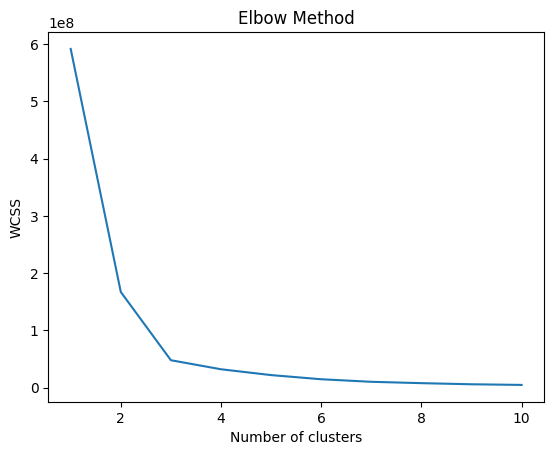

In [25]:
# take already loaded datasets
# KMense clustering come under un supervised learing so it does not contain lable data set we can check the relation between datasets

# Drop non-feature columns
X = df.drop(columns=['House price of unit area', 'Transaction date'])

# check missing values
X.isnull().sum()

WCSS = []
# calculating each distance using Ucledine distance based on centroid point
#  calculate k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

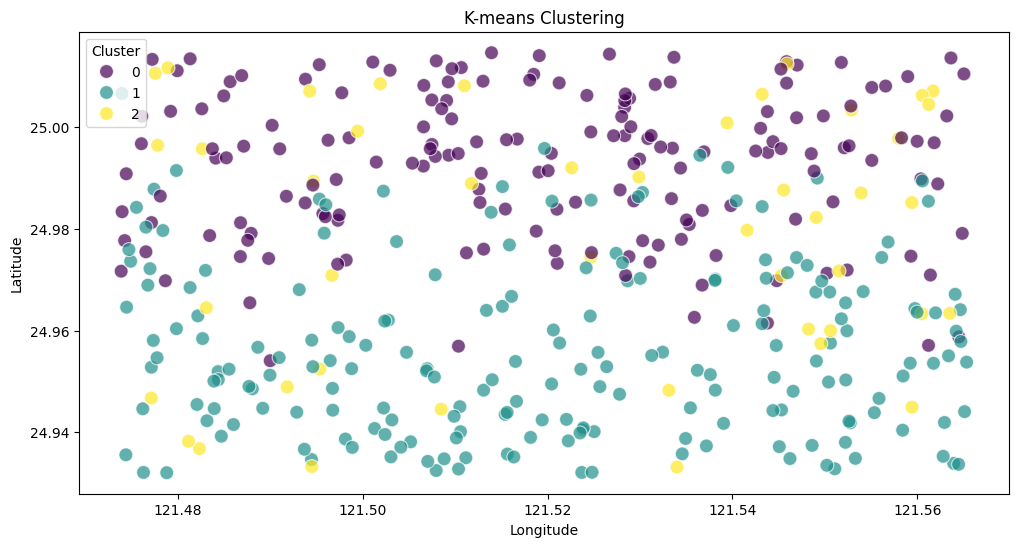

Silhouette Score: 0.1819159951471996


In [26]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Fitting K-Meanse to the datasets
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster lables to the original datasets
df['Cluster'] = y_kmeans


# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-means Clustering')
plt.show()

# Evaluate the clusters (Optional)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')